In this Notebook, It's going to plot different distributions with random variables x1 (generated by a normal distribution), x2 (generated by a gamma distribution), x3 (generated by a exponential distribution), and x4 (generated by uniform distribution) and with 100 samples.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_style('white')

# Animated Figure

when do we use `density=True` in the hist plot?

when we want we to normalize the histogram such that the area under the histogram is equal to 1, and compare the distribution of two or more variables with different sample sizes or bin widths, we set it True. 

when do we use `stacked=True` in the hist plot?

when we want to compare the distribution of two or more variables, visualize the contribution of each variable to the overall distribution, and see how the distribution of a variable changes over time or across different groups.

<IPython.core.display.Javascript object>


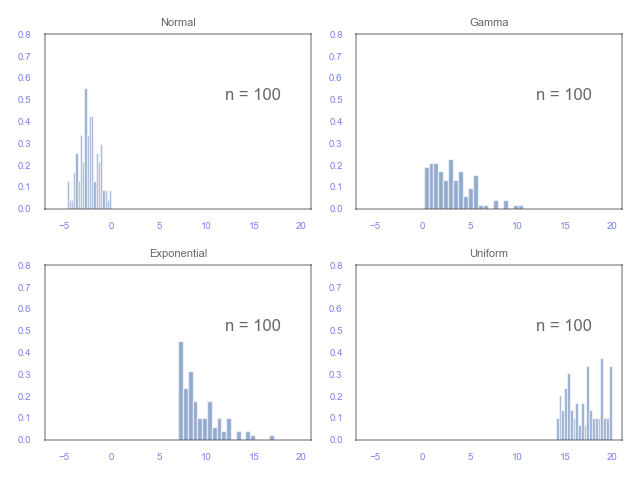

In [2]:
import matplotlib.animation as animation

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)


axes = [ax1, ax2, ax3, ax4]
X = [x1, x2, x3, x4]

def set_title(num):
    if axes[num] == ax1:
        axes[num].set_title('Normal', fontsize=8, alpha=.7)
    elif axes[num] == ax2:
        axes[num].set_title('Gamma', fontsize=8, alpha=.7)
    elif axes[num] == ax3:
        axes[num].set_title('Exponential', fontsize=8, alpha=.7)
    else:
        axes[num].set_title('Uniform', fontsize=8, alpha=.7)
        
n = 100 # the number of samples 
def update_ax(curr): # current frame
    if curr == n:
        a.event_source.stop()
        
    for i in range(0,4):
        axes[i].cla()
        axes[i].hist(X[i][:curr], bins=20, density=True, stacked=True, alpha=.6)
        axes[i].axis([-7, 21, 0, .8])
        set_title(i)
        axes[i].xaxis.set_tick_params(labelsize=7)
        axes[i].yaxis.set_tick_params(labelsize=7)
        axes[i].annotate('n = {}'.format(curr), xy=[12, .5], alpha=0.7)
        axes[i].tick_params(axis=u'both', which=u'both', labelleft=True, labelbottom=True, colors='#7a81e9')
        # The plt.tight_layout() function automatically adjusts subplot parameters to fit the figure area
        plt.tight_layout()


# to animate a figure, we should use the instruction below
a = animation.FuncAnimation(fig, update_ax, interval=50) 

for ax in plt.gcf().get_axes():
    for spineval in ax.spines.values():
        spineval.set_alpha(0.4)